In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
from scripts import graphs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.listdir('../data/')

['LICENSE.md',
 'line-list-gambia.csv',
 'line-list-africa-example.csv',
 'who_covid_19_sit_rep_time_series_africa.csv',
 'line-list-ethiopia.csv',
 'README.md',
 'line-list-algeria.csv',
 'line-list-kenya.csv',
 'line-list-namibia.csv',
 'templates',
 'line-list-nigeria.csv',
 'line-list-south-africa.csv']

# Check dimension of all the csv

In [3]:
glob.glob('../data/*.csv')

['../data/line-list-gambia.csv',
 '../data/line-list-africa-example.csv',
 '../data/who_covid_19_sit_rep_time_series_africa.csv',
 '../data/line-list-ethiopia.csv',
 '../data/line-list-algeria.csv',
 '../data/line-list-kenya.csv',
 '../data/line-list-namibia.csv',
 '../data/line-list-nigeria.csv',
 '../data/line-list-south-africa.csv']

In [4]:
df = pd.concat([pd.read_csv(file) for file in glob.glob('../data/*.csv') 
 if not str.__contains__(file, 'who_') and not str.__contains__(file, 'example')])

In [5]:
df.head()

,case_id,origin_case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,underlyng_conditions
0,1,NaN,2020-03-18,20-29,Female,Fajara,NaN,Gambia,Receiving Treatment,http://www.moh.gov.gm/covid19-update/,NaN,NaN,NaN,NaN,NaN,2020-03-15,UK,NaN,Case flew from England into Gambia and is curr...,NaN
1,2,NaN,2020-03-16,70,Male,Banjul,NaN,Gambia,Deceased,http://www.moh.gov.gm/covid19-update/,Severe,2020-03-17,NaN,NaN,Diabetes,NaN,High risk countries,2020-03-20,Bangladeshi Citizen deceased traveled to six o...,NaN
0,1,NaN,NaN,48,male,Addis Ababa,Addis Ababa,Ethiopia,stable condition,http://www.moh.gov.et/ejcc/en/node/194,NaN,NaN,NaN,2020-03-13,NaN,2020-03-04,Burkina Faso,NaN,Japanese citizen,NaN
1,2,NaN,NaN,42,male,Addis Ababa,Addis Ababa,Ethiopia,stable condition,https://www.fanabc.com/english/ethiopia-corona...,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN,NaN,Ethiopian in close contact with first patien,NaN
2,3,NaN,NaN,44,NaN,Addis Ababa,Addis Ababa,Ethiopia,NaN,https://www.fanabc.com/english/ethiopia-corona...,NaN,NaN,NaN,2020-03-16,NaN,NaN,NaN,NaN,Japanese national in close contact with first ...,NaN


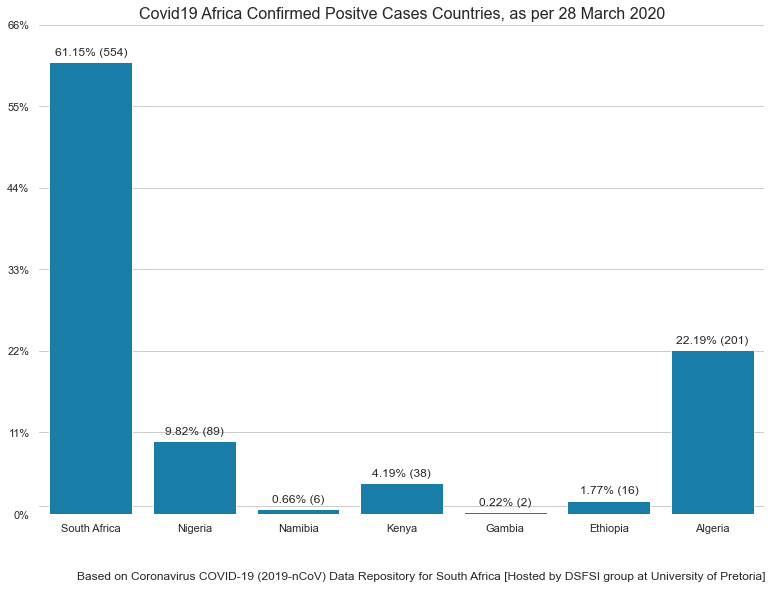

In [6]:
graphs.vertical_bar_chart(df['country'].value_counts(sort=False).reset_index(), 'index', 'country', 'African Countries', 
                          'index', ascending=False)
plt.title("Covid19 Africa Confirmed Positve Cases Countries, as per 28 March 2020", fontsize=16)
plt.annotate('Based on Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]', 
             (0.1, 0.02), xycoords='figure fraction', fontsize=12)
plt.savefig("../visualization/countries_confirmed_cases.png", 
               transparent=True,
               pad_inches=0, dpi = 200)

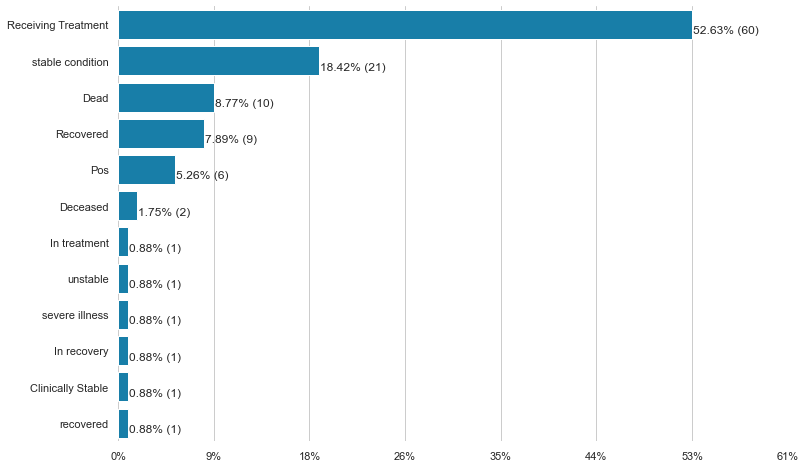

In [7]:
graphs.horizontal_bar_chart(df['current_status'].value_counts().reset_index(),
                            'current_status', 'index', 'Current Status', 
                            figsize=(12, 8))

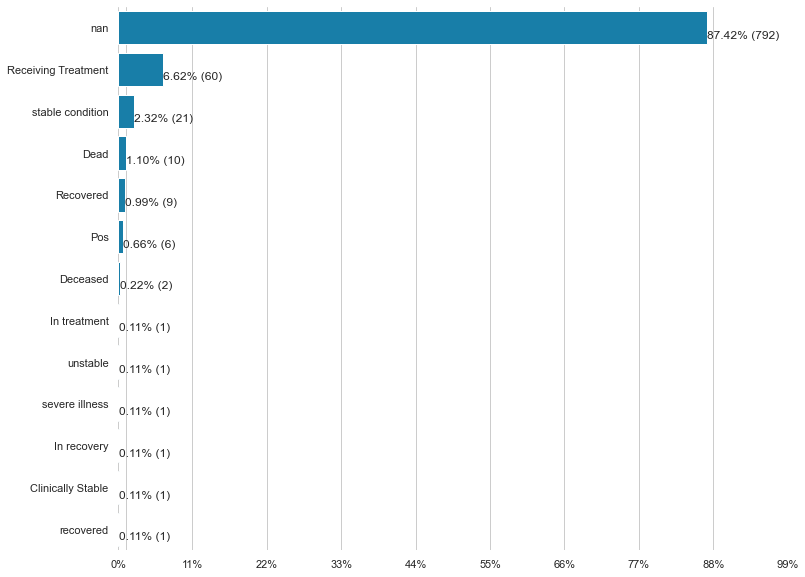

In [8]:
df['current_status'] = df['current_status'].astype(str)
graphs.horizontal_bar_chart(df['current_status'].value_counts(dropna = False).reset_index(),
                            'current_status', 'index', 'Current Status', 
                            figsize=(12, 10))

### In Progress